In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sbr
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import BayesianRidge
le = preprocessing.LabelEncoder()
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [2]:
#Сsv open
data = pd.read_csv('cinema1.csv')
data_regr = data.copy()
data_odd = data.copy()
data.head(10)

,Unnamed: 0,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,Unnamed: 28,war_symb_title,point_symb_title
0,0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,NaN,4,0
1,1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,NaN,8,0
2,2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,NaN,1,0
3,3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,NaN,3,0
4,4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens,8,143,NaN,0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0,NaN,9,0
5,5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,NaN,3,0
6,6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383056,46055,Kirsten Dunst,0,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0,NaN,2,0
7,7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,Brad Garrett,Tangled,294810,2036,M.C. Gainey,1,17th century|based on fairy tale|disney|flower...,http://www.imdb.com/title/tt0398286/?ref_=fn_t...,387,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000,NaN,1,0
8,8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,Chris Hemsworth,Avengers: Age of Ultron,462669,92000,Scarlett Johansson,4,artificial intelligence|based on comic book|ca...,http://www.imdb.com/title/tt2395427/?ref_=fn_t...,1117,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000,NaN,4,0
9,9,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,Alan Rickman,Harry Potter and the Half-Blood Prince,321795,58753,Rupert Grint,3,blood|book|love|potion|professor,http://www.imdb.com/title/tt0417741/?ref_=fn_t...,973,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000,NaN,7,0


In [3]:
#number of rows
print(data.shape[0])
#number of columns
data.shape[1]

5050


32

In [4]:
# dropping rows where > 10% nans
data = data.drop(data[(data.isnull().sum(axis = 1)/data.shape[1])*100 > 10].index)

# define % of nan in columns
(data.isnull().sum()/data.shape[0])*100

Unnamed: 0                    0.000000
color                         0.105775
director_name                 0.000000
num_critic_for_reviews        0.063465
duration                      0.021155
director_facebook_likes       0.000000
actor_3_facebook_likes        0.084620
actor_2_name                  0.000000
actor_1_facebook_likes        0.000000
gross                        12.523799
genres                        0.000000
actor_1_name                  0.000000
movie_title                   0.000000
num_voted_users               0.000000
cast_total_facebook_likes     0.000000
actor_3_name                  0.084620
facenumber_in_poster          0.169241
plot_keywords                 0.973133
movie_imdb_link               0.000000
num_user_for_reviews          0.000000
language                      0.126930
country                       0.000000
content_rating                2.453988
budget                        6.536916
title_year                    0.000000
actor_2_facebook_likes   

In [5]:
# drop Unnamed 0, 18
del data['Unnamed: 28']
del data['Unnamed: 0']

#  score 98.0 is not applicable, needs to be deleted
data['imdb_score'].value_counts()

6.7     213
6.6     193
6.5     182
7.2     181
6.4     178
7.0     178
6.8     175
6.1     174
7.3     173
7.1     172
6.9     170
6.2     169
6.3     168
5.9     143
7.4     130
6.0     128
7.5     122
5.8     119
7.6     117
5.7     113
5.6     109
7.7     106
7.8      99
5.5      96
5.4      96
5.3      84
8.0      73
7.9      66
5.2      65
5.1      65
8.1      62
4.9      48
4.8      44
4.6      38
5.0      37
8.3      34
8.2      32
4.7      27
4.3      26
4.5      25
4.4      24
8.4      23
4.1      23
8.5      21
4.2      19
3.3      17
4.0      15
3.8      14
3.5      13
3.6      13
3.9      11
8.6      11
3.4      10
8.7       8
3.1       7
3.7       7
2.8       6
2.7       6
3.2       5
8.9       5
8.8       5
3.0       4
2.9       3
1.9       3
2.1       3
2.3       3
2.4       2
2.6       2
2.5       2
2.0       2
2.2       2
9.0       2
1.6       1
9.3       1
98.0      1
9.9       1
1.7       1
9.2       1
Name: imdb_score, dtype: int64

In [6]:
# removing outliers
data = data.drop(data[data['imdb_score'] > (data['imdb_score'].mean() +  3 * data['imdb_score'].std()) ].index)
data = data.drop(data[data['imdb_score'] < (data['imdb_score'].mean() -  3 * data['imdb_score'].std()) ].index)

In [7]:
# check that there is no 98.0 score after
data['imdb_score'].value_counts()

6.7    213
6.6    193
6.5    182
7.2    181
7.0    178
6.4    178
6.8    175
6.1    174
7.3    173
7.1    172
6.9    170
6.2    169
6.3    168
5.9    143
7.4    130
6.0    128
7.5    122
5.8    119
7.6    117
5.7    113
5.6    109
7.7    106
7.8     99
5.4     96
5.5     96
5.3     84
8.0     73
7.9     66
5.1     65
5.2     65
8.1     62
4.9     48
4.8     44
4.6     38
5.0     37
8.3     34
8.2     32
4.7     27
4.3     26
4.5     25
4.4     24
8.4     23
4.1     23
8.5     21
4.2     19
3.3     17
4.0     15
3.8     14
3.5     13
3.6     13
3.9     11
8.6     11
3.4     10
8.7      8
3.7      7
3.2      5
8.8      5
8.9      5
9.0      2
9.3      1
9.9      1
9.2      1
Name: imdb_score, dtype: int64

In [8]:
# check 'gross' - 162.0 is too low
data['gross'].value_counts()

177343675.0    3
8000000.0      3
5773519.0      3
218051260.0    3
3000000.0      3
              ..
17474107.0     1
8104069.0      1
10965209.0     1
32416109.0     1
162.0          1
Name: gross, Length: 3981, dtype: int64

In [9]:
# removing outliers
data = data.drop(data[data['gross'] > (data['gross'].mean() +  3 * data['gross'].std()) ].index)
data = data.drop(data[data['gross'] < (data['gross'].mean() -  3 * data['gross'].std()) ].index)

In [10]:
# check 'movie_facebook_likes'
data['movie_facebook_likes'].value_counts()

0         2089
1000       102
11000       79
10000       77
12000       61
          ... 
67           1
633          1
645          1
101000       1
241          1
Name: movie_facebook_likes, Length: 810, dtype: int64

In [11]:
# removing outliers
data = data.drop(data[data['movie_facebook_likes'] > (data['movie_facebook_likes'].mean() +  3 * data['movie_facebook_likes'].std()) ].index)
data = data.drop(data[data['movie_facebook_likes'] < (data['movie_facebook_likes'].mean() -  3 * data['movie_facebook_likes'].std()) ].index)

In [12]:
#fill all nans by mean values in a column to get rid of nans at all
data = data.fillna(data.mean())

In [13]:
# genres split, films can repeat in different genres
data_split = (data.set_index(data.columns.drop('genres',1).tolist())
   .genres.str.split('|', expand=True)
   .stack()
   .reset_index()
   .rename(columns={0:'genres'}))
data_split.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,war_symb_title,point_symb_title,level_29,genres
0,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,8,0,0,Action
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,8,0,1,Adventure
2,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,8,0,2,Fantasy
3,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Daryl Sabara,John Carter,212204,1873,Polly Walker,1,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,3,0,0,Action
4,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Daryl Sabara,John Carter,212204,1873,Polly Walker,1,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,3,0,1,Adventure


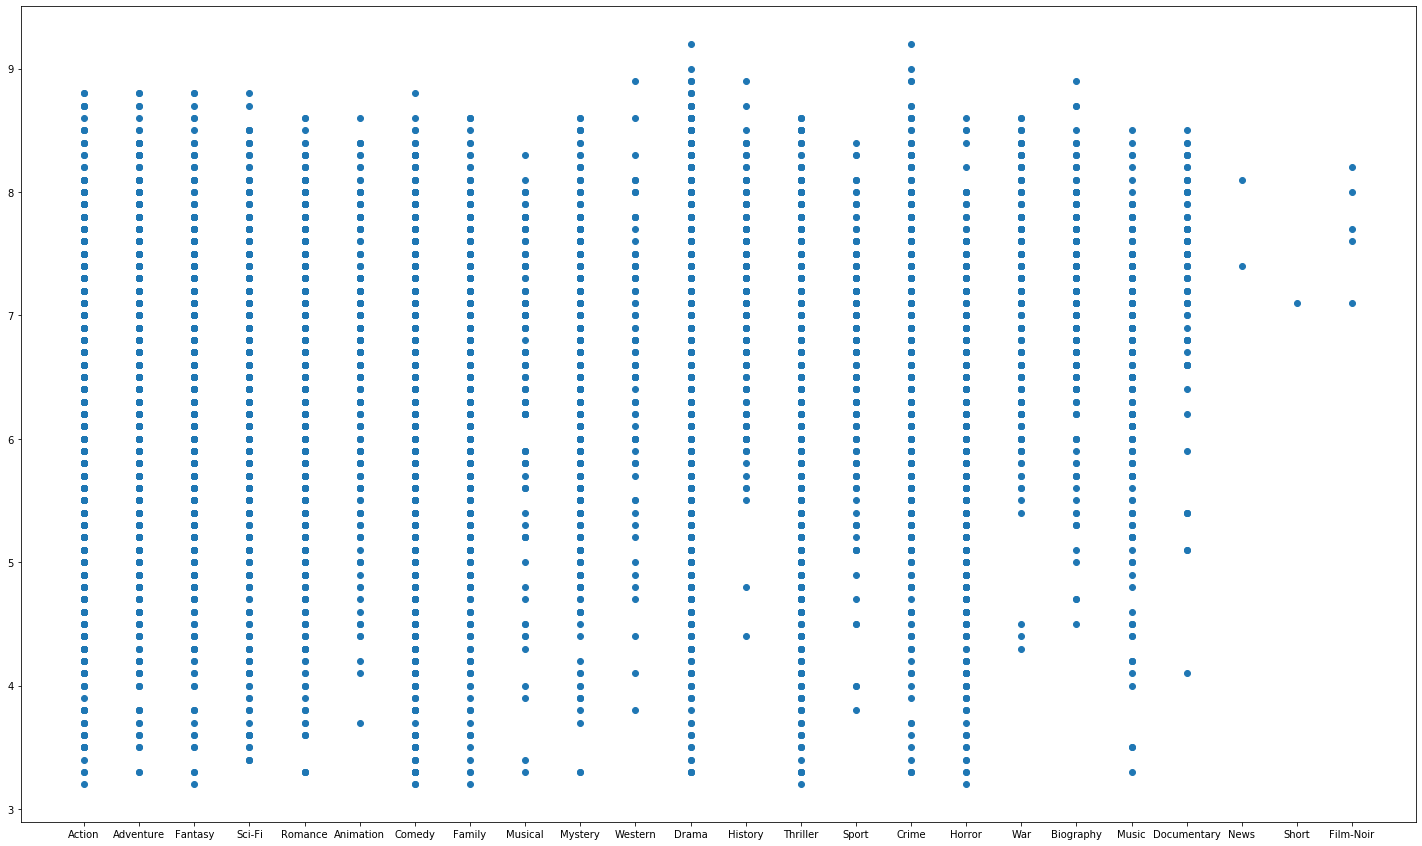

In [14]:
# 'genres' & 'imdb_score'
plt.figure(figsize=(25, 15))
plt.scatter(data_split['genres'],data_split['imdb_score'])

In [15]:

#data_split['genres']
data_split['imdb_score'][data_split['genres']=='Action'].median()

6.3

In [16]:
#data_split['genres']
data_split['imdb_score'][data_split['genres']=='Film-Noir'].median()

7.7

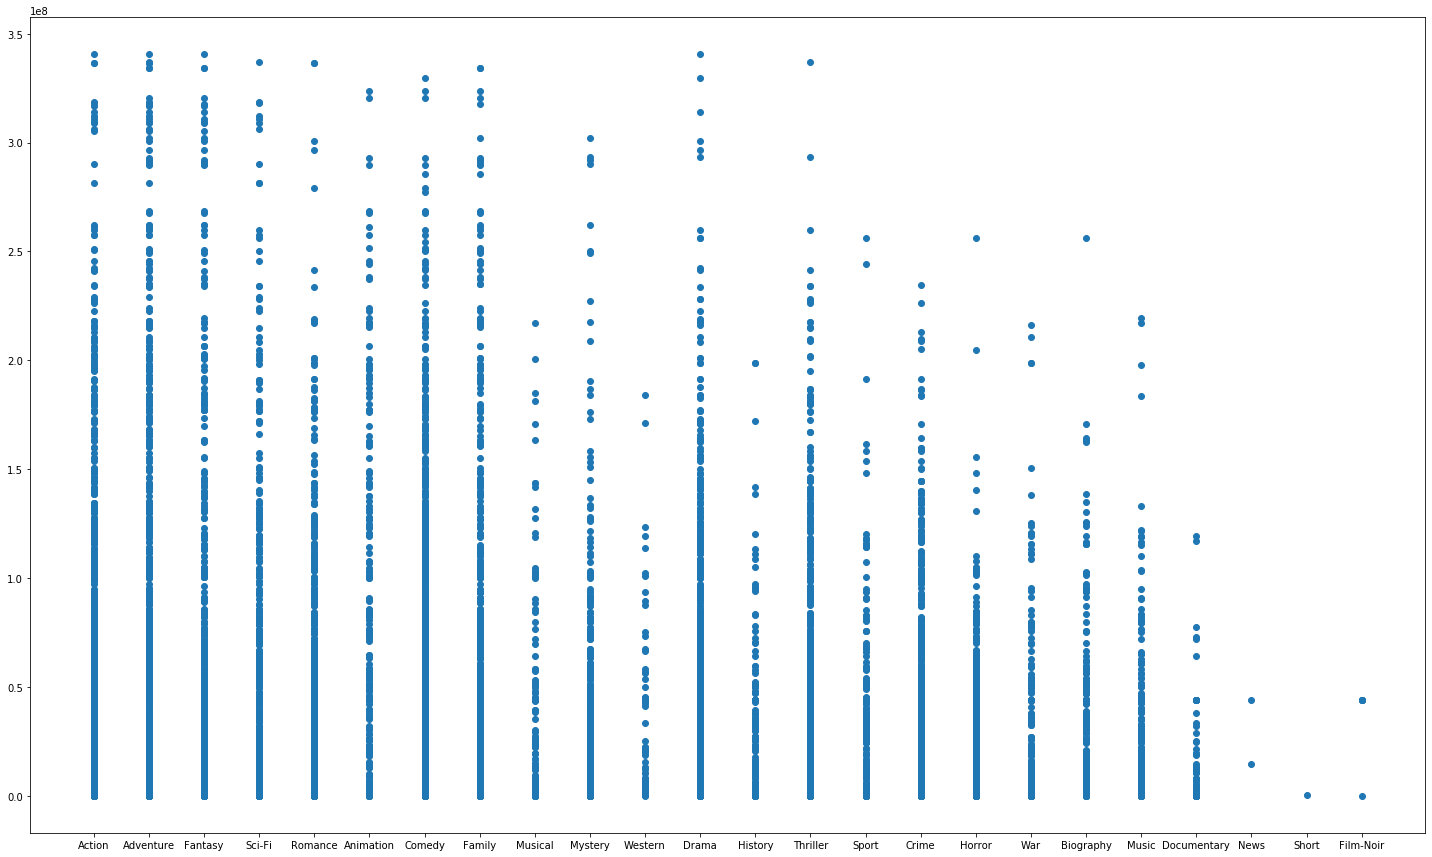

In [17]:
# 'genres' & 'gross'
plt.figure(figsize=(25, 15))
plt.scatter(data_split['genres'],data_split['gross'])

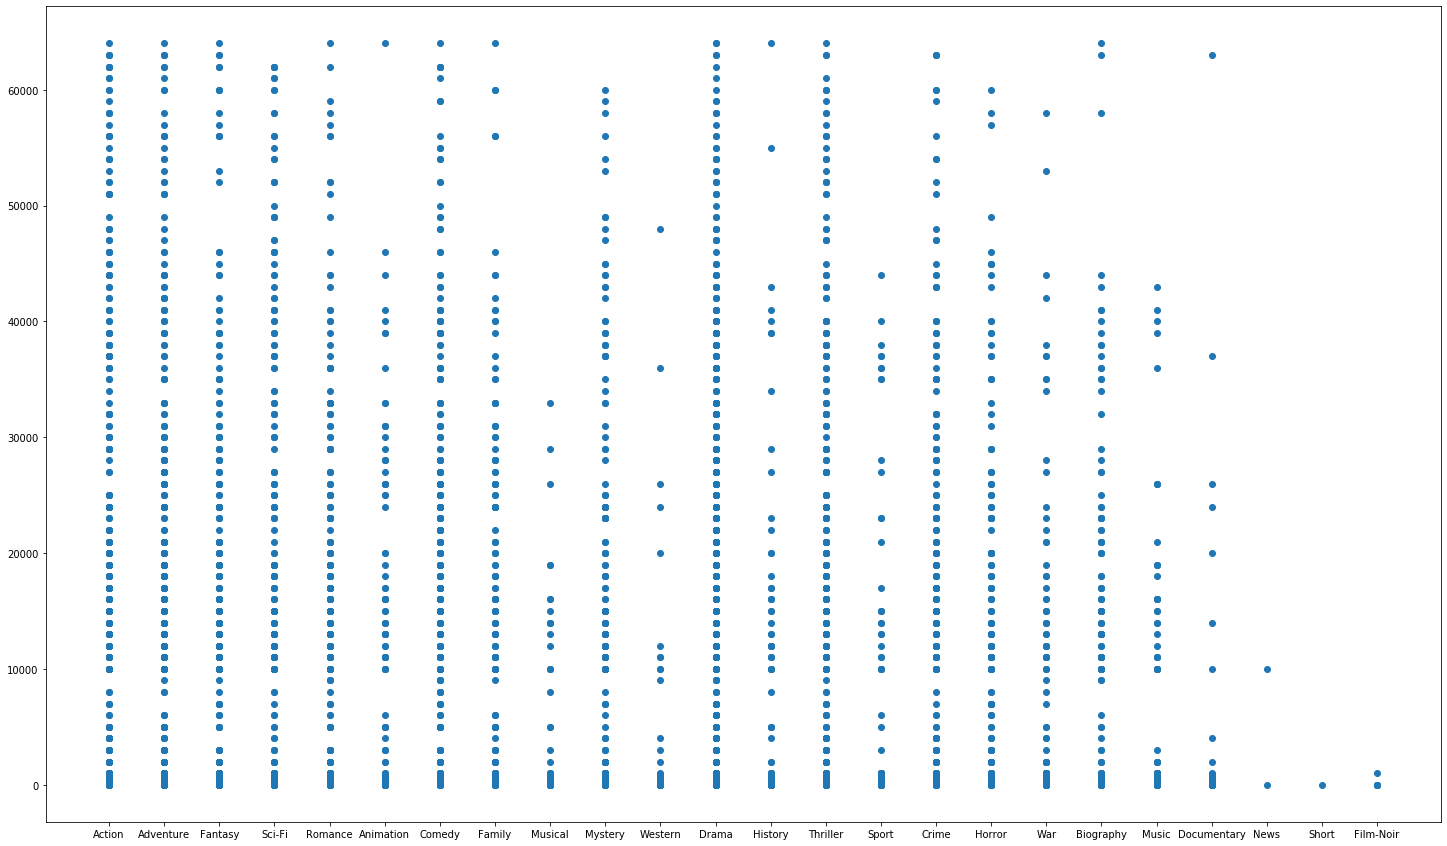

In [18]:
# 'genres' & 'movie_facebook_likes'
plt.figure(figsize=(25, 15))
plt.scatter(data_split['genres'],data_split['movie_facebook_likes'])

In [19]:
# 2 find top 20 actor-director links who give max money money money
n = data.groupby(['actor_1_name', 'director_name'])['gross'].agg('mean')
n = n.sort_values(ascending=False)
n.head(20)

actor_1_name       director_name     
Christopher Lee    Peter Jackson         327158237.5
Steve Coogan       Yarrow Cheney         323505540.0
Justin Timberlake  Chris Miller          320706665.0
Zack Ward          Michael Bay           318759914.0
Robert Downey Jr.  Jon Favreau           315177806.5
Natalie Portman    George Lucas          310675583.0
Jennifer Lawrence  Francis Lawrence      309384965.5
Harrison Ford      Richard Marquand      309125409.0
Will Smith         Roland Emmerich       306124059.0
Alan Rickman       David Yates           301956980.0
Robert Pattinson   David Slade           300523113.0
                   Chris Weitz           296623634.0
Bruce Willis       M. Night Shyamalan    293501675.0
John Ratzenberger  Pete Docter           292979556.0
Robert Pattinson   David Yates           292000866.0
Jim Broadbent      Andrew Adamson        291709845.0
Harrison Ford      Irvin Kershner        290158751.0
Robert Pattinson   Mike Newell           289994397.0
Steve Bu

In [20]:
n2 = data.groupby(['actor_2_name', 'director_name'])['gross'].agg('mean')
n2 = n2.sort_values(ascending=False)
n2.head(20)

actor_2_name            director_name     
James Franco            Sam Raimi             336530303.0
Alan Rickman            Tim Burton            334185206.0
Siobhan Fallon Hogan    Robert Zemeckis       329691196.0
Orlando Bloom           Peter Jackson         327158237.5
Eric Stonestreet        Yarrow Cheney         323505540.0
Eric Idle               Chris Miller          320706665.0
Michael O'Neill         Michael Bay           318759914.0
Jeff Bridges            Jon Favreau           318298180.0
Fiona Shaw              Chris Columbus        317557891.0
Ray Winstone            Steven Spielberg      317011114.0
Scarlett Johansson      Jon Favreau           312057433.0
Christopher Lee         George Lucas          310675583.0
Philip Seymour Hoffman  Francis Lawrence      309384965.5
Ian McDiarmid           Richard Marquand      309125409.0
Orlando Bloom           Gore Verbinski        307396418.5
Kristen Stewart         David Slade           300523113.0
Daniel Radcliffe        David

In [21]:
n3 = data.groupby(['actor_3_name', 'director_name'])['gross'].agg('mean')
n3 = n3.sort_values(ascending=False)
n3.head(20)

actor_3_name        director_name     
Kirsten Dunst       Sam Raimi             336530303.0
Anne Hathaway       Tim Burton            334185206.0
Sam Anderson        Robert Zemeckis       329691196.0
Billy Boyd          Peter Jackson         327158237.5
Albert Brooks       Yarrow Cheney         323505540.0
Rupert Everett      Chris Miller          320706665.0
Kevin Dunn          Michael Bay           318759914.0
Verne Troyer        Chris Columbus        317557891.0
Jim Broadbent       Steven Spielberg      317011114.0
Jon Favreau         Jon Favreau           315177806.5
Hayden Christensen  George Lucas          310675583.0
Josh Hutcherson     Francis Lawrence      309384965.5
Kenny Baker         Richard Marquand      309125409.0
Jack Davenport      Gore Verbinski        307396418.5
Mary McDonnell      Roland Emmerich       306124059.0
Rupert Grint        David Yates           301956980.0
Anna Kendrick       David Slade           300523113.0
Taylor Lautner      Chris Weitz           2

In [22]:
n_main = pd.concat([n,n2, n3])
n_main.sort_values(ascending = False).head(20)

actor_1_name          director_name  
James Franco          Sam Raimi          336530303.0
Kirsten Dunst         Sam Raimi          336530303.0
Alan Rickman          Tim Burton         334185206.0
Anne Hathaway         Tim Burton         334185206.0
Siobhan Fallon Hogan  Robert Zemeckis    329691196.0
Sam Anderson          Robert Zemeckis    329691196.0
Christopher Lee       Peter Jackson      327158237.5
Billy Boyd            Peter Jackson      327158237.5
Orlando Bloom         Peter Jackson      327158237.5
Eric Stonestreet      Yarrow Cheney      323505540.0
Albert Brooks         Yarrow Cheney      323505540.0
Steve Coogan          Yarrow Cheney      323505540.0
Eric Idle             Chris Miller       320706665.0
Justin Timberlake     Chris Miller       320706665.0
Rupert Everett        Chris Miller       320706665.0
Kevin Dunn            Michael Bay        318759914.0
Zack Ward             Michael Bay        318759914.0
Michael O'Neill       Michael Bay        318759914.0
Jeff Bri

In [23]:
# 3 - find coutry with the best mean score
meanData = data.groupby(['country'])['imdb_score'].agg('mean')
meanData.sort_values(ascending=False)

country
Kyrgyzstan            8.700000
Libya                 8.400000
Soviet Union          8.100000
Egypt                 8.100000
Iran                  7.725000
Israel                7.633333
Indonesia             7.600000
Argentina             7.500000
Colombia              7.500000
Afghanistan           7.400000
Sweden                7.400000
New Zealand           7.338462
Brazil                7.275000
West Germany          7.266667
Finland               7.200000
Denmark               7.172727
Taiwan                7.150000
Italy                 7.150000
Greece                7.000000
Mexico                6.973333
Czech Republic        6.966667
Netherlands           6.940000
China                 6.912500
Chile                 6.900000
Dominican Republic    6.900000
Iceland               6.900000
Spain                 6.861290
Hong Kong             6.831250
Japan                 6.825000
UK                    6.799753
India                 6.791304
France                6.736620


In [24]:
# check
n = data.groupby(['country', 'imdb_score'])['imdb_score'].count()
n.head(20)

country      imdb_score
Afghanistan  7.4           1
Argentina    6.7           1
             7.2           1
             7.9           1
             8.2           1
Aruba        4.8           1
Australia    4.8           1
             4.9           1
             5.1           1
             5.2           2
             5.3           3
             5.4           1
             5.5           2
             5.8           2
             5.9           2
             6.0           1
             6.1           3
             6.2           2
             6.3           2
             6.4           2
Name: imdb_score, dtype: int64

In [25]:
# data_split is:
data_split

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,war_symb_title,point_symb_title,level_29,genres
0,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238,English,USA,PG-13,3.000000e+08,2007.0,5000.0,7.1,2.350000,0,8,0,0,Action
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238,English,USA,PG-13,3.000000e+08,2007.0,5000.0,7.1,2.350000,0,8,0,1,Adventure
2,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238,English,USA,PG-13,3.000000e+08,2007.0,5000.0,7.1,2.350000,0,8,0,2,Fantasy
3,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Daryl Sabara,John Carter,212204,1873,Polly Walker,1,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738,English,USA,PG-13,2.637000e+08,2012.0,632.0,6.6,2.350000,24000,3,0,0,Action
4,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Daryl Sabara,John Carter,212204,1873,Polly Walker,1,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738,English,USA,PG-13,2.637000e+08,2012.0,632.0,6.6,2.350000,24000,3,0,1,Adventure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13170,Color,Edward Burns,14.0,95.0,0.0,133.0,Caitlin FitzGerald,296.0,4584.0,Kerry Bishé,Newlyweds,1338,690,Daniella Pineda,1,written and directed by cast member,http://www.imdb.com/title/tt1880418/?ref_=fn_t...,14,English,USA,Not Rated,9.000000e+03,2011.0,205.0,6.4,2.107101,413,2,0,1,Drama
13171,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Alan Ruck,Shanghai Calling,1255,2386,Eliza Coupe,5,NaN,http://www.imdb.com/title/tt2070597/?ref_=fn_t...,9,English,USA,PG-13,3.913273e+07,2012.0,719.0,6.3,2.350000,660,3,0,0,Comedy
13172,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Alan Ruck,Shanghai Calling,1255,2386,Eliza Coupe,5,NaN,http://www.imdb.com/title/tt2070597/?ref_=fn_t...,9,English,USA,PG-13,3.913273e+07,2012.0,719.0,6.3,2.350000,660,3,0,1,Drama
13173,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Alan Ruck,Shanghai Calling,1255,2386,Eliza Coupe,5,NaN,http://www.imdb.com/title/tt2070597/?ref_=fn_t...,9,English,USA,PG-13,3.913273e+07,2012.0,719.0,6.3,2.350000,660,3,0,2,Romance


In [26]:
# make n = data_split with drama only
n = data_split.drop(data_split[data_split['genres'] != 'Drama'].index)
n.head(100)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,war_symb_title,point_symb_title,level_29,genres
46,Color,Ridley Scott,343.0,156.0,0.0,738.0,William Hurt,891.0,1.052197e+08,Mark Addy,Robin Hood,211765,3244,Scott Grimes,0,1190s|archer|england|king of england|robin hood,http://www.imdb.com/title/tt0955308/?ref_=fn_t...,546,English,USA,PG-13,2.000000e+08,2010.0,882.0,6.7,2.35,17000,1,0,2,Drama
53,Color,Peter Jackson,446.0,201.0,0.0,84.0,Thomas Kretschmann,6000.0,2.180513e+08,Naomi Watts,King Kong,316018,7123,Evan Parke,0,animal name in title|ape abducts a woman|goril...,http://www.imdb.com/title/tt0360717/?ref_=fn_t...,2618,English,New Zealand,PG-13,2.070000e+08,2005.0,919.0,7.2,2.35,0,0,0,2,Drama
131,Color,Robert Zemeckis,240.0,96.0,0.0,10000.0,Colin Firth,18000.0,1.378501e+08,Robin Wright,A Christmas Carol,72809,48878,Gary Oldman,0,charles dickens|christmas|christmas eve|ghost|...,http://www.imdb.com/title/tt1067106/?ref_=fn_t...,249,English,USA,PG,2.000000e+08,2009.0,14000.0,6.8,2.35,0,5,0,1,Drama
139,Color,David Yates,248.0,110.0,282.0,103.0,Alexander Skarsgård,11000.0,1.240518e+08,Christoph Waltz,The Legend of Tarzan,42372,21175,Casper Crump,2,africa|capture|jungle|male objectification|tarzan,http://www.imdb.com/title/tt0918940/?ref_=fn_t...,239,English,USA,PG-13,1.800000e+08,2016.0,10000.0,6.6,2.35,29000,3,0,2,Drama
161,Color,Martin Scorsese,682.0,126.0,17000.0,1000.0,Christopher Lee,17000.0,7.382009e+07,Chloë Grace Moretz,Hugo,245333,36017,Ray Winstone,0,automaton|mechanical|railway station|steampunk...,http://www.imdb.com/title/tt0970179/?ref_=fn_t...,678,English,USA,PG,1.700000e+08,2011.0,16000.0,7.5,1.85,42000,0,0,1,Drama
189,Color,Rupert Sanders,416.0,132.0,274.0,11000.0,Kristen Stewart,26000.0,1.551118e+08,Chris Hemsworth,Snow White and the Huntsman,228554,72881,Sam Claflin,0,evil queen|fairy tale|magic|queen|snow white,http://www.imdb.com/title/tt1735898/?ref_=fn_t...,710,English,USA,PG-13,1.700000e+08,2012.0,17000.0,6.1,2.35,53000,4,0,2,Drama
193,Color,Matt Reeves,521.0,130.0,198.0,884.0,Judy Greer,10000.0,2.085438e+08,Gary Oldman,Dawn of the Planet of the Apes,317542,14363,Kodi Smit-McPhee,0,ape|dam|leader|post apocalypse|sequel,http://www.imdb.com/title/tt2103281/?ref_=fn_t...,620,English,USA,PG-13,1.700000e+08,2014.0,2000.0,7.6,1.85,45000,4,0,2,Drama
197,Color,Carl Rinsch,218.0,128.0,47.0,982.0,Cary-Hiroyuki Tagawa,18000.0,3.829730e+07,Keanu Reeves,47 Ronin,116994,20965,Jin Akanishi,2,box office flop|ronin|samurai|shogun|tournament,http://www.imdb.com/title/tt1335975/?ref_=fn_t...,324,English,USA,PG-13,1.750000e+08,2013.0,1000.0,6.3,2.35,35000,1,0,2,Drama
216,Color,Don Hall,384.0,102.0,38.0,562.0,Daniel Henney,756.0,2.224877e+08,Damon Wayans Jr.,Big Hero 6,279093,2963,Abraham Benrubi,0,high tech|martial arts|masked man|robot|superhero,http://www.imdb.com/title/tt2245084/?ref_=fn_t...,433,English,USA,PG,1.650000e+08,2014.0,719.0,7.9,2.39,41000,1,0,4,Drama
237,Color,David Fincher,362.0,166.0,21000.0,919.0,Jason Flemyng,11000.0,1.274908e+08,Brad Pitt,The Curious Case of Benjamin Button,459346,13333,Julia Ormond,2,deformed baby|diary|lingerie slip|older man yo...,http://www.imdb.com/title/tt0421715/?ref_=fn_t...,822,English,USA,PG-13,1.500000e+08,2008.0,1000.0,7.8,2.35,23000,3,0,0,Drama


In [27]:
# keywords of Drama
n['plot_keywords'].value_counts()

animal name in title|ape abducts a woman|gorilla|island|king kong                                                            3
based on novel                                                                                                               3
assistant|experiment|frankenstein|medical student|scientist                                                                  3
1988 winter olympics|coach|ski jumper|winter|winter olympics                                                                 2
army|black soldier|military uniform|prejudice|u.s. civil war                                                                 2
                                                                                                                            ..
cigarette butt|drone|funeral procession|nellis air force base|taliban                                                        1
american actress playing british character|book publishing|calorie counting|employer employee relationship|rabb

In [28]:
# splitted keywords of Drama
n_split = (n.set_index(n.columns.drop('plot_keywords',1).tolist())
   .plot_keywords.str.split('|', expand=True)
   .stack()
   .reset_index()
   .rename(columns={0:'keyword'}))
n_split.head(100)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,war_symb_title,point_symb_title,level_29,genres,level_30,keyword
0,Color,Ridley Scott,343.0,156.0,0.0,738.0,William Hurt,891.0,105219735.0,Mark Addy,Robin Hood,211765,3244,Scott Grimes,0,http://www.imdb.com/title/tt0955308/?ref_=fn_t...,546,English,USA,PG-13,200000000.0,2010.0,882.0,6.7,2.35,17000,1,0,2,Drama,0,1190s
1,Color,Ridley Scott,343.0,156.0,0.0,738.0,William Hurt,891.0,105219735.0,Mark Addy,Robin Hood,211765,3244,Scott Grimes,0,http://www.imdb.com/title/tt0955308/?ref_=fn_t...,546,English,USA,PG-13,200000000.0,2010.0,882.0,6.7,2.35,17000,1,0,2,Drama,1,archer
2,Color,Ridley Scott,343.0,156.0,0.0,738.0,William Hurt,891.0,105219735.0,Mark Addy,Robin Hood,211765,3244,Scott Grimes,0,http://www.imdb.com/title/tt0955308/?ref_=fn_t...,546,English,USA,PG-13,200000000.0,2010.0,882.0,6.7,2.35,17000,1,0,2,Drama,2,england
3,Color,Ridley Scott,343.0,156.0,0.0,738.0,William Hurt,891.0,105219735.0,Mark Addy,Robin Hood,211765,3244,Scott Grimes,0,http://www.imdb.com/title/tt0955308/?ref_=fn_t...,546,English,USA,PG-13,200000000.0,2010.0,882.0,6.7,2.35,17000,1,0,2,Drama,3,king of england
4,Color,Ridley Scott,343.0,156.0,0.0,738.0,William Hurt,891.0,105219735.0,Mark Addy,Robin Hood,211765,3244,Scott Grimes,0,http://www.imdb.com/title/tt0955308/?ref_=fn_t...,546,English,USA,PG-13,200000000.0,2010.0,882.0,6.7,2.35,17000,1,0,2,Drama,4,robin hood
5,Color,Peter Jackson,446.0,201.0,0.0,84.0,Thomas Kretschmann,6000.0,218051260.0,Naomi Watts,King Kong,316018,7123,Evan Parke,0,http://www.imdb.com/title/tt0360717/?ref_=fn_t...,2618,English,New Zealand,PG-13,207000000.0,2005.0,919.0,7.2,2.35,0,0,0,2,Drama,0,animal name in title
6,Color,Peter Jackson,446.0,201.0,0.0,84.0,Thomas Kretschmann,6000.0,218051260.0,Naomi Watts,King Kong,316018,7123,Evan Parke,0,http://www.imdb.com/title/tt0360717/?ref_=fn_t...,2618,English,New Zealand,PG-13,207000000.0,2005.0,919.0,7.2,2.35,0,0,0,2,Drama,1,ape abducts a woman
7,Color,Peter Jackson,446.0,201.0,0.0,84.0,Thomas Kretschmann,6000.0,218051260.0,Naomi Watts,King Kong,316018,7123,Evan Parke,0,http://www.imdb.com/title/tt0360717/?ref_=fn_t...,2618,English,New Zealand,PG-13,207000000.0,2005.0,919.0,7.2,2.35,0,0,0,2,Drama,2,gorilla
8,Color,Peter Jackson,446.0,201.0,0.0,84.0,Thomas Kretschmann,6000.0,218051260.0,Naomi Watts,King Kong,316018,7123,Evan Parke,0,http://www.imdb.com/title/tt0360717/?ref_=fn_t...,2618,English,New Zealand,PG-13,207000000.0,2005.0,919.0,7.2,2.35,0,0,0,2,Drama,3,island
9,Color,Peter Jackson,446.0,201.0,0.0,84.0,Thomas Kretschmann,6000.0,218051260.0,Naomi Watts,King Kong,316018,7123,Evan Parke,0,http://www.imdb.com/title/tt0360717/?ref_=fn_t...,2618,English,New Zealand,PG-13,207000000.0,2005.0,919.0,7.2,2.35,0,0,0,2,Drama,4,king kong


In [29]:
# find mostly used words in Drama
n_split['keyword'].value_counts().head(20)

love                  140
friend                102
murder                 78
death                  70
police                 62
friendship             53
school                 49
new york city          49
boy                    44
high school            41
marriage               40
drugs                  39
money                  34
lawyer                 33
revenge                33
singer                 32
female protagonist     31
sex                    30
hospital               30
texas                  29
Name: keyword, dtype: int64

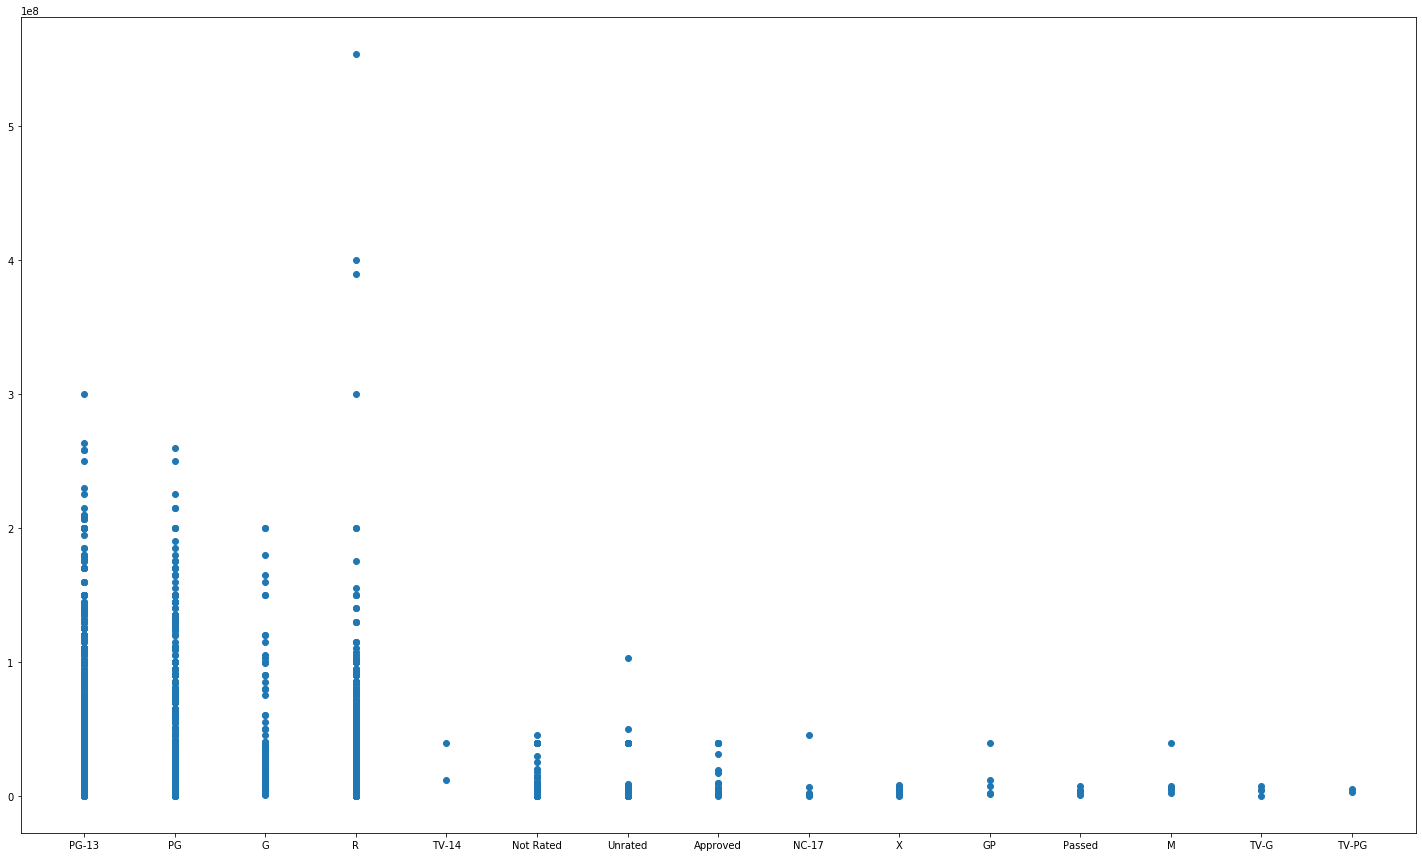

In [30]:
#BY PG 
plt.figure(figsize=(25, 15))
data_budg = data.dropna(subset = ['content_rating'])
data_budg = data_budg.drop(data_budg[data_budg['budget'] > (data_budg['budget'].mean() +  3 * data_budg['budget'].std()) ].index)
data_budg = data_budg.drop(data_budg[data_budg['budget'] < (data_budg['budget'].mean() -  3 * data_budg['budget'].std()) ].index)
plt.scatter(data_budg['content_rating'],data_budg['budget'])

In [31]:
#LABA 2 
data_corr = data.copy()
data_corr = data_corr.drop(data_corr[data_corr['budget'] > (data_corr['budget'].mean() +  3 * data_corr['budget'].std()) ].index)
data_corr = data_corr.drop(data_corr[data_corr['budget'] < (data_corr['budget'].mean() -  3 * data_corr['budget'].std()) ].index)

data_corr = data_corr.drop(data_corr[data_corr['duration'] > (data_corr['duration'].mean() +  3 * data_corr['duration'].std()) ].index)
data_corr = data_corr.drop(data_corr[data_corr['duration'] < (data_corr['duration'].mean() -  3 * data_corr['duration'].std()) ].index)

data_corr = data_corr.drop(data_corr[data_corr['movie_facebook_likes'] > (data_corr['movie_facebook_likes'].mean() +  3 * data_corr['movie_facebook_likes'].std()) ].index)
data_corr = data_corr.drop(data_corr[data_corr['movie_facebook_likes'] < (data_corr['movie_facebook_likes'].mean() -  3 * data_corr['movie_facebook_likes'].std()) ].index)

data_corr = data_corr.drop(data_corr[data_corr['gross'] > (data_corr['gross'].mean() +  3 * data_corr['gross'].std()) ].index)
data_corr = data_corr.drop(data_corr[data_corr['gross'] < (data_corr['gross'].mean() -  3 * data_corr['gross'].std()) ].index)

#data_corr = data_corr.drop(data_corr[data_corr['gross'] > (data_corr['gross'].mean() +  3 * data_corr['gross'].std()) ].index)
#data_corr = data_corr.drop(data_corr[data_corr['gross'] < (data_corr['gross'].mean() -  3 * data_corr['gross'].std()) ].index)

data_corr = data_corr.drop(data_corr[data_corr['cast_total_facebook_likes'] > (data_corr['cast_total_facebook_likes'].mean() +  3 * data_corr['cast_total_facebook_likes'].std()) ].index)
data_corr = data_corr.drop(data_corr[data_corr['cast_total_facebook_likes'] < (data_corr['cast_total_facebook_likes'].mean() -  3 * data_corr['cast_total_facebook_likes'].std()) ].index)

data_corr = data_corr.drop(data_corr[data_corr['actor_1_facebook_likes'] > (data_corr['actor_1_facebook_likes'].mean() +  3 * data_corr['actor_1_facebook_likes'].std()) ].index)
data_corr = data_corr.drop(data_corr[data_corr['actor_1_facebook_likes'] < (data_corr['actor_1_facebook_likes'].mean() -  3 * data_corr['actor_1_facebook_likes'].std()) ].index)

data_corr = data_corr.drop(data_corr[data_corr['actor_2_facebook_likes'] > (data_corr['actor_2_facebook_likes'].mean() +  3 * data_corr['actor_2_facebook_likes'].std()) ].index)
data_corr = data_corr.drop(data_corr[data_corr['actor_2_facebook_likes'] < (data_corr['actor_2_facebook_likes'].mean() -  3 * data_corr['actor_2_facebook_likes'].std()) ].index)

data_corr = data_corr.drop(data_corr[data_corr['actor_3_facebook_likes'] > (data_corr['actor_3_facebook_likes'].mean() +  3 * data_corr['actor_3_facebook_likes'].std()) ].index)
data_corr = data_corr.drop(data_corr[data_corr['actor_3_facebook_likes'] < (data_corr['actor_3_facebook_likes'].mean() -  3 * data_corr['actor_3_facebook_likes'].std()) ].index)

data_corr = data_corr.drop(data_corr[data_corr['num_critic_for_reviews'] > (data_corr['num_critic_for_reviews'].mean() +  3 * data_corr['num_critic_for_reviews'].std()) ].index)
data_corr = data_corr.drop(data_corr[data_corr['num_critic_for_reviews'] < (data_corr['num_critic_for_reviews'].mean() -  3 * data_corr['num_critic_for_reviews'].std()) ].index)

data_corr = data_corr.drop(data_corr[data_corr['imdb_score'] > (data_corr['imdb_score'].mean() +  3 * data_corr['imdb_score'].std()) ].index)
data_corr = data_corr.drop(data_corr[data_corr['imdb_score'] < (data_corr['imdb_score'].mean() -  3 * data_corr['imdb_score'].std()) ].index)

data_corr = data_corr.drop(data_corr[data_corr['budget'] > (data_corr['budget'].mean() +  3 * data_corr['budget'].std()) ].index)
data_corr = data_corr.drop(data_corr[data_corr['budget'] < (data_corr['budget'].mean() -  3 * data_corr['budget'].std()) ].index)


data_corr['content_rating'] = data_corr['content_rating'].astype(str)
data_corr['color'] = data_corr['color'].astype(str)
data_corr['content_rating'] = le.fit_transform(data_corr['content_rating'])
data_corr['color'] = le.fit_transform(data_corr['color'])

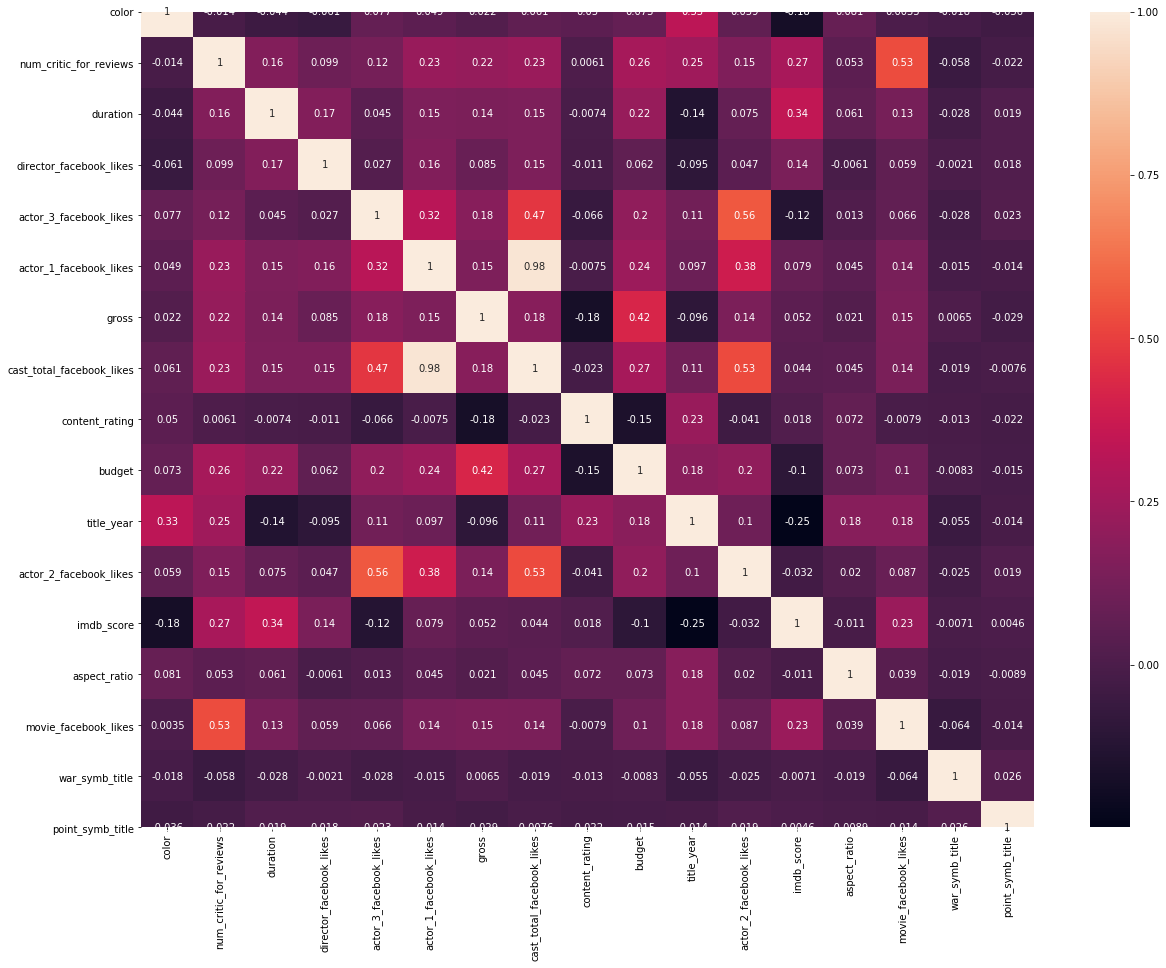

In [32]:
# let's see correlation table with content_rating
plt.figure(figsize=(20, 15))
M = data_corr.corr()
sbr.heatmap(M, cbar=True, annot=True)

In [33]:
my_data = data_regr.copy()
my_data = my_data.drop(my_data[(my_data.isnull().sum(axis = 1)/my_data.shape[1])*100 > 10].index)

del my_data ['Unnamed: 28']
del my_data['Unnamed: 0']

my_data = my_data.drop(my_data[my_data['movie_facebook_likes'] > (my_data['movie_facebook_likes'].mean() +  3 * my_data['movie_facebook_likes'].std()) ].index)
my_data = my_data.drop(my_data[my_data['movie_facebook_likes'] < (my_data['movie_facebook_likes'].mean() -  3 * my_data['movie_facebook_likes'].std()) ].index)

my_data = my_data.drop(my_data[my_data['gross'] > (my_data['gross'].mean() +  3 * my_data['gross'].std()) ].index)
my_data = my_data.drop(my_data[my_data['gross'] < (my_data['gross'].mean() -  3 * my_data['gross'].std()) ].index)

my_data = my_data.drop(my_data[my_data['gross'] > (my_data['gross'].mean() +  3 * my_data['gross'].std()) ].index)
my_data = my_data.drop(my_data[my_data['gross'] < (my_data['gross'].mean() -  3 * my_data['gross'].std()) ].index)

my_data = my_data.drop(my_data[my_data['duration'] > (my_data['duration'].mean() +  3 * my_data['duration'].std()) ].index)
my_data = my_data.drop(my_data[my_data['duration'] < (my_data['duration'].mean() -  3 * my_data['duration'].std()) ].index)

my_data = my_data.drop(my_data[my_data['cast_total_facebook_likes'] > (my_data['cast_total_facebook_likes'].mean() +  3 * my_data['cast_total_facebook_likes'].std()) ].index)
my_data = my_data.drop(my_data[my_data['cast_total_facebook_likes'] < (my_data['cast_total_facebook_likes'].mean() -  3 * my_data['cast_total_facebook_likes'].std()) ].index)

my_data = my_data.drop(my_data[my_data['actor_1_facebook_likes'] > (my_data['actor_1_facebook_likes'].mean() +  3 * my_data['actor_1_facebook_likes'].std()) ].index)
my_data = my_data.drop(my_data[my_data['actor_1_facebook_likes'] < (my_data['actor_1_facebook_likes'].mean() -  3 * my_data['actor_1_facebook_likes'].std()) ].index)

my_data = my_data.drop(my_data[my_data['actor_2_facebook_likes'] > (my_data['actor_2_facebook_likes'].mean() +  3 * my_data['actor_2_facebook_likes'].std()) ].index)
my_data = my_data.drop(my_data[my_data['actor_2_facebook_likes'] < (my_data['actor_2_facebook_likes'].mean() -  3 * my_data['actor_2_facebook_likes'].std()) ].index)

my_data = my_data.drop(my_data[my_data['actor_3_facebook_likes'] > (my_data['actor_3_facebook_likes'].mean() +  3 * my_data['actor_3_facebook_likes'].std()) ].index)
my_data = my_data.drop(my_data[my_data['actor_3_facebook_likes'] < (my_data['actor_3_facebook_likes'].mean() -  3 * my_data['actor_3_facebook_likes'].std()) ].index)

my_data = my_data.drop(my_data[my_data['num_critic_for_reviews'] > (my_data['num_critic_for_reviews'].mean() +  3 * my_data['num_critic_for_reviews'].std()) ].index)
my_data = my_data.drop(my_data[my_data['num_critic_for_reviews'] < (my_data['num_critic_for_reviews'].mean() -  3 * my_data['num_critic_for_reviews'].std()) ].index)

my_data = my_data.drop(my_data[my_data['imdb_score'] > (my_data['imdb_score'].mean() +  3 * my_data['imdb_score'].std()) ].index)
my_data = my_data.drop(my_data[my_data['imdb_score'] < (my_data['imdb_score'].mean() -  3 * my_data['imdb_score'].std()) ].index)

my_data = my_data.drop(my_data[my_data['budget'] > (my_data['budget'].mean() +  3 * my_data['budget'].std()) ].index)
my_data = my_data.drop(my_data[my_data['budget'] < (my_data['budget'].mean() -  3 * my_data['budget'].std()) ].index)

#my_data = my_data.drop(my_data[my_data['budget'] > (my_data['budget'].mean() +  3 * my_data['budget'].std()) ].index)
#my_data = my_data.drop(my_data[my_data['budget'] < (my_data['budget'].mean() -  3 * my_data['budget'].std()) ].index)


my_data = my_data.fillna(my_data.mean())

#Split by genres
my_data = (my_data.set_index(my_data.columns.drop('genres',1).tolist())
   .genres.str.split('|', expand=True)
   .stack()
   .reset_index()
   .rename(columns={0:'genres'}))
my_data.head()

#Drop all non sci-fi genres
my_data = my_data.drop(my_data[my_data['genres'] != 'Sci-Fi'].index)

print(my_data.shape[0])

439


In [34]:
data_reg = pd.DataFrame (my_data, columns = ['director_name','duration','budget','gross', 'imdb_score','genres','actor_1_facebook_likes', 'actor_3_facebook_likes','actor_2_facebook_likes', 'actor_1_name','actor_2_name','actor_3_name','cast_total_facebook_likes', 'num_critic_for_reviews','movie_facebook_likes'])

#Creating numbers of string
data_reg['director_name'] = data_reg['director_name'].astype(str)
data_reg['director_name'] = le.fit_transform(data_reg['director_name'])

data_reg['actor_1_name'] = data_reg['actor_1_name'].astype(str)
data_reg['actor_1_name'] = le.fit_transform(data_reg['actor_1_name'])

data_reg['actor_2_name'] = data_reg['actor_2_name'].astype(str)
data_reg['actor_2_name'] = le.fit_transform(data_reg['actor_2_name'])

data_reg['actor_3_name'] = data_reg['actor_3_name'].astype(str)
data_reg['actor_3_name'] = le.fit_transform(data_reg['actor_3_name'])

data_reg['genres'] = data_reg['genres'].astype(str)
data_reg['genres'] = le.fit_transform(data_reg['genres'])

#DATA NORMALIZATION
#data_reg = (data_reg-data_reg.min())/(data_reg.max()-data_reg.min())

#Total Plot
#data_reg.plot(figsize=(20,15))

#Correlation plot
#plt.scatter(data_reg['imdb_score'], data_reg['gross'])

X = data_reg[['director_name','actor_1_name','genres','actor_2_name','budget','imdb_score','num_critic_for_reviews','movie_facebook_likes', 'actor_1_facebook_likes','actor_2_facebook_likes','actor_3_facebook_likes']]
Y = data_reg['gross']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

reg = LinearRegression().fit(X_train, Y_train)
print(reg.score(X_test, Y_test))
#print(reg.intercept_)
#print(reg.coef_)

0.2921601102624395


In [35]:
from sklearn import metrics
y_pred = reg.predict(X_test)
d_pred = pd.DataFrame({'Real': Y_test.values.flatten(), 'Predicted': y_pred.flatten()})
d_pred

,Real,Predicted
0,1.867399e+08,1.077582e+08
1,5.074008e+07,4.166140e+07
2,3.170442e+07,1.180397e+08
3,3.555019e+07,3.185827e+07
4,3.555019e+07,4.226280e+07
...,...,...
105,3.500000e+06,1.659170e+07
106,3.555019e+07,3.165210e+07
107,1.775709e+07,2.193447e+07
108,1.378284e+07,3.792704e+07


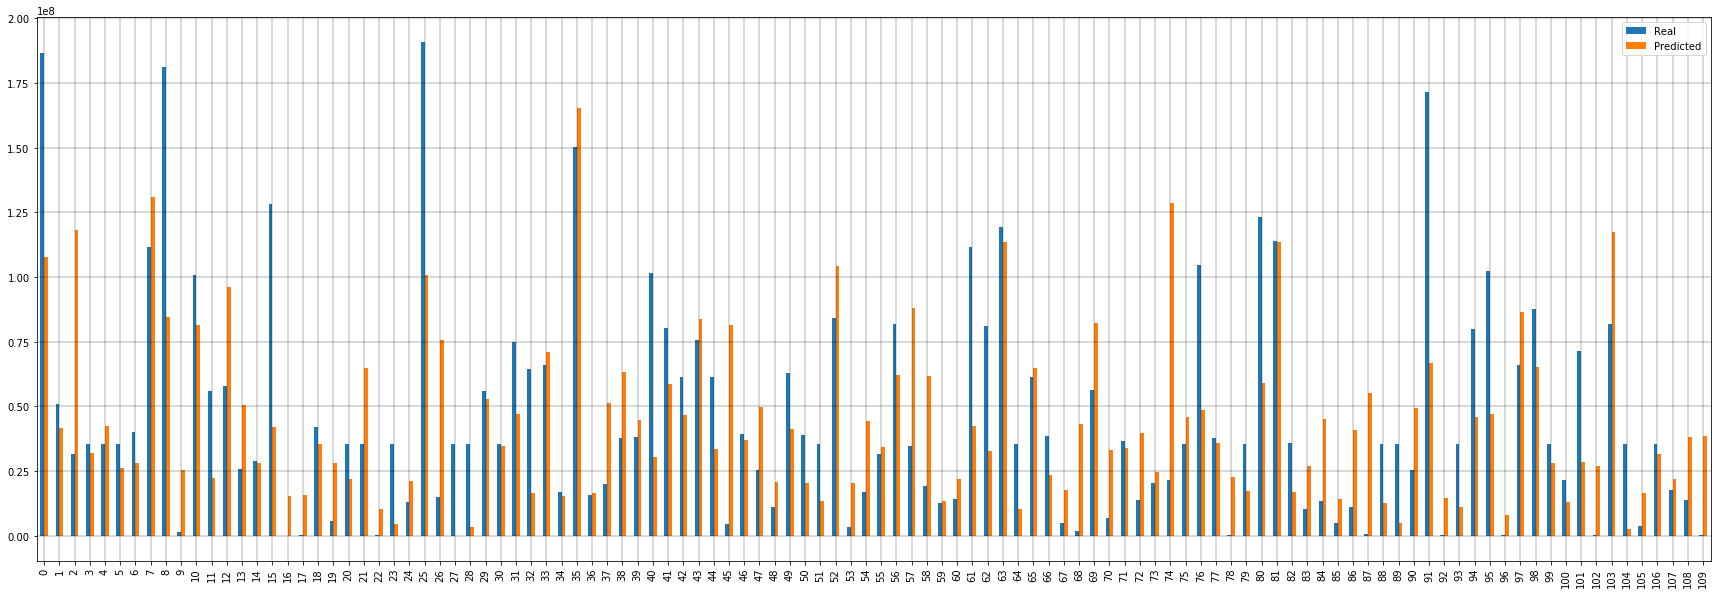

In [36]:
df1 = d_pred.head(110)
df1.plot(kind='bar',figsize=(30,10))
plt.grid(linestyle='-', linewidth='0.3', color='black')
plt.show()

In [37]:
# FIND 'SPECIAL' FILMS
# delete unnamed 28/0
my_odd = data_odd.copy()
my_odd = my_odd.fillna(my_odd.mean())
#my_odd = my_odd.drop(my_odd[(my_data.isnull().sum(axis = 1)/my_odd.shape[1])*100 > 10].index)
del my_odd ['Unnamed: 28']
del my_odd['Unnamed: 0']

In [38]:
#search by imdb_score
my_odd.imdb_score.value_counts().head(20)

6.7    223
6.6    201
7.2    195
7.0    189
6.5    186
6.4    185
7.3    184
6.8    181
7.1    181
6.1    179
6.3    176
6.9    175
6.2    175
7.4    147
5.9    144
7.5    140
6.0    131
7.6    124
5.8    124
5.7    117
Name: imdb_score, dtype: int64

In [39]:
#tail

my_odd.imdb_score.value_counts().tail(20)

3.0     5
8.9     5
2.9     4
2.1     3
9.1     3
9.0     3
1.9     3
2.3     3
2.2     3
2.0     2
2.5     2
2.4     2
2.6     2
9.5     1
1.7     1
9.2     1
9.9     1
98.0    1
1.6     1
9.3     1
Name: imdb_score, dtype: int64

In [40]:
#FOUND FILM 1
my_oddimdb = my_odd.drop(my_odd[my_odd.imdb_score != 98.0].index)
my_oddimdb.head(20)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,war_symb_title,point_symb_title
5038,Color,Thomas L. Phillips,13.0,82.0,120.0,84.0,Joe Coffey,785.0,4.951350e+07,Comedy|Horror|Thriller,Julianna Pitt,Sanctuary,Quite a Conundrum,133,1111,John Lucas,NaN,nudity|party|pirate|swimsuit|three word title,http://www.imdb.com/title/tt2049518/?ref_=fn_t...,8,English,USA,3.971317e+07,200000.0,2012.0,98.0,5.4,16,3,0


In [41]:
my_oddimdb = my_odd.drop(my_odd[my_odd.imdb_score > 0.0].index)
my_oddimdb.head(20)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,war_symb_title,point_symb_title


In [42]:
#search by duration tail
my_odd.duration.value_counts().tail(20)

289.0    1
185.0    1
300.0    1
187.0    1
293.0    1
163.0    1
216.0    1
11.0     1
334.0    1
54.0     1
63.0     1
225.0    1
286.0    1
330.0    1
50.0     1
200.0    1
58.0     1
14.0     1
34.0     1
226.0    1
Name: duration, dtype: int64

In [43]:
my_oddduration = my_odd.drop(my_odd[my_odd.duration > 20.0].index)
my_oddduration.head(20)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,war_symb_title,point_symb_title
1948,Color,NaN,12.0000,7.0,686.39163,3.0,John Sparkes,45.0,4.951350e+07,Animation|Comedy|Family,Justin Fletcher,Shaun the Sheep,7968,55,Kate Harbour,0,farmer|mischief|no dialog|sheep|sheepdog,http://www.imdb.com/title/tt0983983/?ref_=fn_t...,12,English,UK,TV-G,3.971317e+07,2042.540065,7.0,8.3,2.217354,834,1,0
2346,Color,Jane Clark,140.1672,7.0,23.00000,51.0,Traci Dinwiddie,344.0,4.951350e+07,Romance|Short,Necar Zadegan,The Touch,118,726,Elea Oberon,0,lesbian|paris france|period piece|poem|poetess,http://www.imdb.com/title/tt1128219/?ref_=fn_t...,NaN,English,USA,NaN,1.300000e+04,2007.000000,281.0,5.2,1.850000,30,0,0
4080,Color,NaN,38.0000,11.0,686.39163,0.0,Seth Green,11.0,4.951350e+07,Animation|Comedy,Matthew Senreich,Robot Chicken,32923,11,Breckin Meyer,0,celebrity|robot|satire|sketch comedy|stop moti...,http://www.imdb.com/title/tt0437745/?ref_=fn_t...,75,English,USA,TV-MA,3.971317e+07,2042.540065,0.0,7.8,1.330000,1000,1,0
4440,Color,Robert Greenwald,56.0000,20.0,21.00000,0.0,Jon Hunter,0.0,4.951350e+07,Documentary,Lee Scott,Wal-Mart: The High Cost of Low Price,4120,0,Matt Hunter,0,greed|pollution|slave labor|truth|wal mart,http://www.imdb.com/title/tt0473107/?ref_=fn_t...,70,English,USA,Not Rated,1.500000e+06,2005.000000,0.0,6.8,1.850000,0,6,0
4674,Color,Clark Baker,1.0000,14.0,0.00000,37.0,Alan Pietruszewski,134.0,4.951350e+07,Horror|Sci-Fi|Short|Thriller,Taylor Pigeon,Vessel,292,315,Whit Spurgeon,1,alien|flight attendant|monster|pilot|tentacle,http://www.imdb.com/title/tt2164708/?ref_=fn_t...,3,English,USA,NaN,3.971317e+07,2012.000000,93.0,6.2,2.217354,14,0,0


In [44]:
my_oddduration = my_odd.drop(my_odd[my_odd.duration <300.0].index)
my_oddduration.head(20)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,war_symb_title,point_symb_title
1144,Color,Michael Cimino,102.0,325.0,517.00000,678.0,Sam Waterston,12000.0,1.500000e+06,Adventure|Drama|Western,Jeff Bridges,Heaven's Gate,9830,14255,Isabelle Huppert,0,1890s|hired gun|immigrant|johnson county war|s...,http://www.imdb.com/title/tt0080855/?ref_=fn_t...,189,English,USA,R,4.400000e+07,1980.000000,849.0,6.8,2.35,1000,2,0
1501,Color,Taylor Hackford,12.0,330.0,138.00000,672.0,Jesse Borrego,848.0,4.496583e+06,Crime|Drama,Delroy Lindo,"Blood In, Blood Out",23181,3227,Raymond Cruz,2,1970s|1980s|barrio|gang war|mexican,http://www.imdb.com/title/tt0106469/?ref_=fn_t...,129,English,USA,R,3.500000e+07,1993.000000,674.0,8.0,1.66,6000,0,0
1710,Color,NaN,16.0,511.0,686.39163,51.0,Ingvar Eggert Sigurðsson,147.0,4.951350e+07,Crime|Drama|Thriller,Ólafur Darri Ólafsson,Trapped,2308,307,Björn Hlynur Haraldsson,0,coastal town|iceland|police|snowstorm|winter s...,http://www.imdb.com/title/tt3561180/?ref_=fn_t...,19,Icelandic,Iceland,NaN,3.971317e+07,2042.540065,63.0,8.2,16.00,0,2,0
2467,Color,NaN,108.0,334.0,686.39163,30.0,Nora von Waldstätten,897.0,1.451180e+05,Biography|Crime|Drama|Thriller,Edgar Ramírez,Carlos,10111,1032,Katharina Schüttler,0,opec|pubic hair|revolutionary|terrorism|true c...,http://www.imdb.com/title/tt1321865/?ref_=fn_t...,36,English,France,Not Rated,3.971317e+07,2042.540065,30.0,7.7,2.35,0,2,0
3312,Color,Chatrichalerm Yukol,31.0,300.0,6.00000,6.0,Chatchai Plengpanich,7.0,4.542550e+05,Action|Adventure|Drama|History|War,Sarunyu Wongkrachang,The Legend of Suriyothai,1666,32,Mai Charoenpura,3,16th century|burmese|invasion|queen|thailand,http://www.imdb.com/title/tt0290879/?ref_=fn_t...,47,Thai,Thailand,R,4.000000e+08,2001.000000,6.0,6.6,1.85,124,2,0


In [45]:
#search by director_facebook_likes
my_odd.director_facebook_likes.value_counts().tail(20)

710.0    1
358.0    1
643.0    1
239.0    1
199.0    1
251.0    1
177.0    1
302.0    1
969.0    1
531.0    1
512.0    1
798.0    1
522.0    1
800.0    1
104.0    1
224.0    1
554.0    1
393.0    1
474.0    1
764.0    1
Name: director_facebook_likes, dtype: int64

In [46]:
my_odd_directors = my_odd.drop(my_odd[my_odd.director_facebook_likes >= 0].index)
my_odd_directors.head(20)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,war_symb_title,point_symb_title


In [47]:
#search by actor 1 likes tail
my_odd.actor_1_facebook_likes.value_counts().tail(20)

641.0    1
504.0    1
392.0    1
70.0     1
239.0    1
99.0     1
291.0    1
398.0    1
166.0    1
856.0    1
111.0    1
98.0     1
188.0    1
41.0     1
49.0     1
43.0     1
360.0    1
59.0     1
118.0    1
265.0    1
Name: actor_1_facebook_likes, dtype: int64

In [48]:
#FOUND FILM 2
my_odd_actor1 = my_odd.drop(my_odd[my_odd.actor_1_facebook_likes >= 0].index)
my_odd_actor1.head(20)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,war_symb_title,point_symb_title
1761,Color,IC Wiener,666.0,69.0,17.0,100500.0,Nibbler,-32.0,1111111.0,Fantasy|Comedy|Sci-Fi,Philip J. Fry,No name yet,41,404,Turangalila,7,future|mission|space|delivery|bite my shiny me...,http://www.imdb.com/title/tt0119210/?ref_=fn_t...,25,English,USA,R,37000001.0,1999.0,102.0,6.9,1.85,123,1,0


In [49]:
#search by actor 2 likes tail
my_odd.actor_2_facebook_likes.value_counts().tail(20)

600.0      1
339.0      1
867.0      1
2012.0     1
818.0      1
411.0      1
29000.0    1
180.0      1
802.0      1
126.0      1
986.0      1
166.0      1
156.0      1
420.0      1
752.0      1
140.0      1
865.0      1
435.0      1
751.0      1
527.0      1
Name: actor_2_facebook_likes, dtype: int64

In [50]:
my_odd_actor2 = my_odd.drop(my_odd[my_odd.actor_2_facebook_likes >= 0].index)
my_odd_actor2.head(20)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,war_symb_title,point_symb_title


In [51]:
#search by actor 3 likes
my_odd.actor_3_facebook_likes.value_counts().tail(20)

665.0    1
860.0    1
431.0    1
626.0    1
646.0    1
862.0    1
291.0    1
351.0    1
996.0    1
632.0    1
532.0    1
871.0    1
774.0    1
818.0    1
156.0    1
821.0    1
875.0    1
738.0    1
829.0    1
607.0    1
Name: actor_3_facebook_likes, dtype: int64

In [52]:
my_odd_actor3 = my_odd.drop(my_odd[my_odd.actor_3_facebook_likes >= 0].index)
my_odd_actor3.head(20)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,war_symb_title,point_symb_title


In [53]:
#search by budget tail
my_odd.budget.value_counts().tail(20)

2650000.0      1
14000.0        1
3977000.0      1
825000.0       1
1420000.0      1
230000000.0    1
21150000.0     1
1100.0         1
609000.0       1
14200000.0     1
31115000.0     1
3660000.0      1
13200000.0     1
14600000.0     1
142000000.0    1
9400000.0      1
989000.0       1
7623000.0      1
270000.0       1
218.0          1
Name: budget, dtype: int64

In [54]:
my_odd_budget = my_odd.drop(my_odd[my_odd.budget >= 0].index)
my_odd_budget.head(20)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,war_symb_title,point_symb_title


In [55]:
my_odd_budget = my_odd.drop(my_odd[my_odd.budget != 218.0].index)
my_odd_budget.head(20)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,war_symb_title,point_symb_title
4800,Color,Jonathan Caouette,72.0,88.0,20.0,0.0,Jonathan Caouette,58.0,592014.0,Biography|Documentary,Greg Ayres,Tarnation,5709,78,Renee Leblanc,3,answering machine|home movie|lithium|schizophr...,http://www.imdb.com/title/tt0390538/?ref_=fn_t...,114,English,USA,Unrated,218.0,2003.0,20.0,7.2,1.37,754,3,0


In [56]:
#search by year tail
my_odd.title_year.value_counts().tail(20)

1949.0      2
1942.0      2
1937.0      2
1955.0      2
1938.0      2
1920.0      1
1941.0      1
1950.0      1
1935.0      1
1943.0      1
1925.0      1
1932.0      1
1916.0      1
1930.0      1
1944.0      1
2019.0      1
1958.0      1
200000.0    1
1934.0      1
1927.0      1
Name: title_year, dtype: int64

In [57]:
#FOUND FILM 3 = 1
my_odd_year = my_odd.drop(my_odd[my_odd.title_year != 200000.0].index)
my_odd_year.head(20)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,war_symb_title,point_symb_title
5038,Color,Thomas L. Phillips,13.0,82.0,120.0,84.0,Joe Coffey,785.0,4.951350e+07,Comedy|Horror|Thriller,Julianna Pitt,Sanctuary,Quite a Conundrum,133,1111,John Lucas,NaN,nudity|party|pirate|swimsuit|three word title,http://www.imdb.com/title/tt2049518/?ref_=fn_t...,8,English,USA,3.971317e+07,200000.0,2012.0,98.0,5.4,16,3,0


In [58]:
my_odd_year = my_odd.drop(my_odd[my_odd.title_year >= 0.0].index)
my_odd_year.head(20)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,war_symb_title,point_symb_title


In [59]:
#search by movie_facebook_likes tail
my_odd.movie_facebook_likes.value_counts().tail(20)

155      1
151      1
530      1
197      1
201      1
538      1
542      1
546      1
221      1
85000    1
229      1
233      1
237      1
79       1
71       1
257      1
67       1
55       1
269      1
191      1
Name: movie_facebook_likes, dtype: int64

In [60]:
my_odd_movie_likes = my_odd.drop(my_odd[my_odd.movie_facebook_likes >= 0].index)
my_odd_movie_likes.head(20)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,war_symb_title,point_symb_title


In [61]:
#search by gross tail
my_odd.gross.value_counts().tail(20)

6531491.0      1
12570442.0     1
11227940.0     1
700000.0       1
380262555.0    1
22717758.0     1
25339117.0     1
39143839.0     1
4903000.0      1
841206.0       1
223878.0       1
7186670.0      1
75573300.0     1
760505847.0    1
43337279.0     1
2268296.0      1
217387997.0    1
17474107.0     1
8104069.0      1
162.0          1
Name: gross, dtype: int64

In [62]:
my_odd_gross = my_odd.drop(my_odd[my_odd.gross >= 0].index)
my_odd_gross.head(20)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,war_symb_title,point_symb_title


In [63]:
#search by language tail
my_odd.language.value_counts().tail(20)

Maya          1
Bosnian       1
Urdu          1
Kannada       1
8             1
Filipino      1
Telugu        1
Kazakh        1
Slovenian     1
Panjabi       1
Tamil         1
Dzongkha      1
Mongolian     1
Hungarian     1
Morse         1
Czech         1
Greek         1
Aramaic       1
Vietnamese    1
Swahili       1
Name: language, dtype: int64

In [64]:
#FOUND FILM 4 = 1
my_odd_language = my_odd.drop(my_odd[my_odd.language != '8'].index)
my_odd_language.head(20)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,war_symb_title,point_symb_title
5038,Color,Thomas L. Phillips,13.0,82.0,120.0,84.0,Joe Coffey,785.0,4.951350e+07,Comedy|Horror|Thriller,Julianna Pitt,Sanctuary,Quite a Conundrum,133,1111,John Lucas,NaN,nudity|party|pirate|swimsuit|three word title,http://www.imdb.com/title/tt2049518/?ref_=fn_t...,8,English,USA,3.971317e+07,200000.0,2012.0,98.0,5.4,16,3,0


In [65]:
#search by country tail
my_odd.country.value_counts().tail(20)

Cameroon                1
Panama                  1
Egypt                   1
Bulgaria                1
Turkey                  1
Cambodia                1
Afghanistan             1
Georgia                 1
Colombia                1
Finland                 1
Pakistan                1
Philippines             1
Libya                   1
Peru                    1
New Line                1
Aruba                   1
Bahamas                 1
Slovakia                1
Dominican Republic      1
United Arab Emirates    1
Name: country, dtype: int64

In [66]:
#FOUND FILM 3 
my_odd_country = my_odd.drop(my_odd[my_odd.country != 'Official site'].index)
my_odd_country.head(20)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,war_symb_title,point_symb_title
2676,Color,Shana Feste,135.0,117.0,19.0,461.0,Cinda McCain,3000.0,20218921.0,Drama|Music,Leighton Meester,Country Strong,14814,4204,Tim McGraw,4,country music|panties|pink panties|relapse|son...,http://www.imdb.com/title/tt1555064/?ref_=fn_t...,114,English,Official site,PG-13,15000000.0,2010.0,646.0,6.3,2.35,0,2,0


In [67]:
#search by num_voted_users
my_odd.num_voted_users.value_counts().tail(20)

170027    1
25883     1
22123     1
35140     1
78454     1
114321    1
101627    1
80429     1
24570     1
47968     1
14985     1
514125    1
70292     1
7894      1
573541    1
387436    1
5061      1
22521     1
18271     1
25843     1
Name: num_voted_users, dtype: int64

In [68]:
my_odd_voted_users = my_odd.drop(my_odd[my_odd.num_voted_users != '265'].index)
my_odd_voted_users.head(20)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,war_symb_title,point_symb_title
4638,Color,Sanjay Rawal,9.0,83.0,0.0,17.0,Robert Kennedy Jr.,56.0,4.951350e+07,Documentary|News,Alma Martinez,Food Chains,265,104,Eve Ensler,0,two word title,http://www.imdb.com/title/tt2141739/?ref_=fn_t...,3,English,USA,NaN,913000.0,2014.0,28.0,7.1,2.217354,489,1,0


In [69]:
#search by color
my_odd.color.value_counts().tail(20)

Color               4821
Black and White      209
Green and Yellow       1
Name: color, dtype: int64

In [70]:
#FOUND FILM 4
my_odd_color = my_odd.drop(my_odd[my_odd.color != 'Green and Yellow'].index)
my_odd_color.head(20)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,war_symb_title,point_symb_title
4941,Green and Yellow,Aina Obama,140.0,108.0,777.0,100.0,200,300.0,4.444444e+09,Animation|Documentary,Unit 1,A!O!U!I!E!,35701,1488,Unit 3,3,no fate| detroit| michigan| merefa| absolution...,http://www.imdb.com/title/tt2403815/?ref_=fn_t...,3,Morse,Kyrgyzstan,NaN,21345000.0,2019.0,3.0,9.9,1.0,7517,1,5


In [71]:
#search by content_rating
my_odd.content_rating.value_counts().tail(20)

R            2119
PG-13        1461
PG            701
Not Rated     116
G             112
Unrated        62
Approved       55
TV-14          30
TV-MA          20
TV-PG          13
X              13
TV-G           10
Passed          9
NC-17           7
GP              6
M               5
USA             1
TV-Y            1
TV-Y7           1
Name: content_rating, dtype: int64

In [72]:
#FOUND FILM 5 = 1
my_odd_content_rating = my_odd.drop(my_odd[my_odd.content_rating != 'USA'].index)
my_odd_content_rating.head(20)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,war_symb_title,point_symb_title
5038,Color,Thomas L. Phillips,13.0,82.0,120.0,84.0,Joe Coffey,785.0,4.951350e+07,Comedy|Horror|Thriller,Julianna Pitt,Sanctuary,Quite a Conundrum,133,1111,John Lucas,NaN,nudity|party|pirate|swimsuit|three word title,http://www.imdb.com/title/tt2049518/?ref_=fn_t...,8,English,USA,3.971317e+07,200000.0,2012.0,98.0,5.4,16,3,0


In [73]:
#Split by genres and analize
my_odd_genres = (my_odd.set_index(my_odd.columns.drop('genres',1).tolist())
   .genres.str.split('|', expand=True)
   .stack()
   .reset_index()
   .rename(columns={0:'genres'}))

my_odd_genres.genres.value_counts().tail(20)

Crime          889
Sci-Fi         617
Fantasy        611
Horror         565
Family         546
Mystery        500
Biography      293
Animation      243
Music          214
War            213
History        207
Sport          182
Musical        132
Documentary    122
Western         97
Film-Noir        6
Short            5
News             3
Reality-TV       2
Game-Show        1
Name: genres, dtype: int64

In [74]:
#FOUND FILM 5?
my_odd_genres = my_odd_genres.drop(my_odd_genres[my_odd_genres.genres != 'Game-Show'].index)
my_odd_genres.head(20)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,war_symb_title,point_symb_title,level_29,genres
7054,Color,NaN,5.0,60.0,686.39163,664.526358,NaN,98.0,4.951350e+07,Chris Harrison,The Bachelor,4398,98,NaN,0,bachelor|seeking love|single guy|tv host|women...,http://www.imdb.com/title/tt0313038/?ref_=fn_t...,33,English,USA,NaN,3000000.0,2042.540065,1650.540798,2.9,2.217354,141,2,0,0,Game-Show


In [75]:
#search by facenumber_in_poster
my_odd.facenumber_in_poster.value_counts().tail(20)

0             2152
1             1251
2              721
3              381
4              207
5              114
6               76
7               49
8               37
9               18
10              10
15               6
11               5
12               4
13               2
43               1
19               1
31               1
John Lucas       1
14               1
Name: facenumber_in_poster, dtype: int64

In [76]:
#FOUND FILM 6 = 1
my_odd_face = my_odd.drop(my_odd[my_odd.facenumber_in_poster != 'John Lucas'].index)
my_odd_face.head(20)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,war_symb_title,point_symb_title
5038,Color,Thomas L. Phillips,13.0,82.0,120.0,84.0,Joe Coffey,785.0,4.951350e+07,Comedy|Horror|Thriller,Julianna Pitt,Sanctuary,Quite a Conundrum,133,1111,John Lucas,NaN,nudity|party|pirate|swimsuit|three word title,http://www.imdb.com/title/tt2049518/?ref_=fn_t...,8,English,USA,3.971317e+07,200000.0,2012.0,98.0,5.4,16,3,0
